# Import Airpassenger Dataset

In [139]:
import pandas as pd
A = pd.read_csv("E:/AirPassengers.csv")

In [140]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [141]:
#to give column name
A = A.rename(columns = {"Month":"year","#Passengers":"passengers"})

In [142]:
A.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [143]:
#to convert into correct data format
A.year = pd.to_datetime(A.year,format = "%Y-%m")

In [144]:
A.index = A.year#time should not be a specific column,it should be an index

In [145]:
A = A.drop(labels = ["year"],axis = 1)

In [146]:
A

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Visualise Original Time-Series

In [147]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'NO.of passengers')

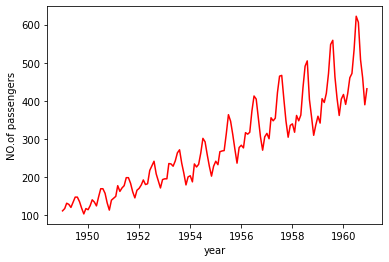

In [148]:
#Visualise the airpassenger dataset
plt.plot(A,c="red")
plt.xlabel("year")
plt.ylabel("NO.of passengers")

Air passengers data from 1949 to 1961 show significant upward growth of passengers.

# To visualise the components of time-series

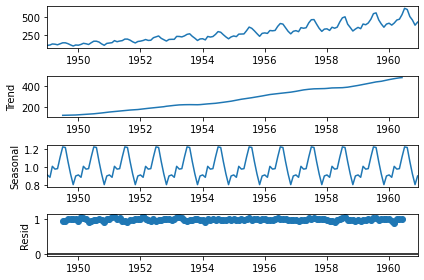

In [149]:
#Decompose Time-Series based on seasons
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(A,model = "multiplicative")
fig.plot()
plt.show()

# Standardization of Time-Series

In [162]:
#Improving rolling mean using better standardisation than log that is Z-score
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Std_df = pd.DataFrame(ss.fit_transform(A[["passengers"]]),columns = ["passengers"],index = A.index)

In [163]:
Std_df

,passengers
year,
1949-01-01,-1.407779
1949-02-01,-1.357590
1949-03-01,-1.240483
1949-04-01,-1.265578
1949-05-01,-1.332496
...,...
1960-08-01,2.724417
1960-09-01,1.904669
1960-10-01,1.511525


In [151]:
A[["passengers"]].mean()

passengers    280.298611
dtype: float64

# Rolling mean

In [152]:
#standartisation using Log
import numpy as np
log_pass = np.log(A[["passengers"]])

Text(0, 0.5, 'No.of passengers')

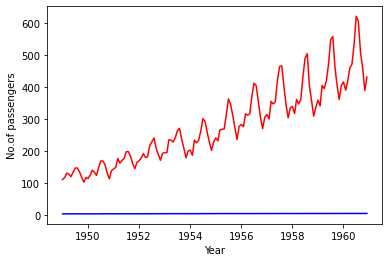

In [153]:
#Comparing original time-series and Standardise time-series
plt.plot(A,c = "red")
plt.plot(log_pass,c = "blue")
plt.xlabel("Year")
plt.ylabel("No.of passengers")

In [165]:
# rolling mean
rm = log_pass.rolling(window = 12).mean()

In [166]:
#Difference of log and rolling mean
A["diff"] = log_pass - rm

In [167]:
#To remove null values
B = A[A["diff"].isnull()==False]

In [168]:
B = B.drop(labels = ["passengers"],axis = 1)

In [169]:
B.head(2)

,diff
year,
1949-12-01,-0.065494
1950-01-01,-0.093449


In [170]:
B.columns = ["Pass"]

In [171]:
B

,Pass
year,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


# Dicky_fuller test

In [221]:
#Numeric way of testing using p-value
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(B["Pass"]))

In [178]:
x

(-3.162907991300854,
 0.0222346300012441,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)

In [182]:
#original time series of testing p-value
from statsmodels.tsa.stattools import adfuller
y = adfuller(pd.Series(A["passengers"]))

In [183]:
y

(0.8153688792060468,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

# To check Stationary or non Stationary

In [186]:
#Standarize time series
if(x[1]<0.05):
    print("Stationary")
else:
    print("Non Stationary")

Stationary


In [187]:
# Original time Series
if(y[1]<0.05):
    print("Stationary")
else:
    print("Non Stationary")

Non Stationary


# Forecasting using AR Model

In [188]:
trd = B[B.index.year<=1958]
tsd = B[B.index.year>1958]

In [189]:
trd

,Pass
year,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1958-08-01,0.298412
1958-09-01,0.075268
1958-10-01,-0.045657


In [190]:
tsd

,Pass
year,
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


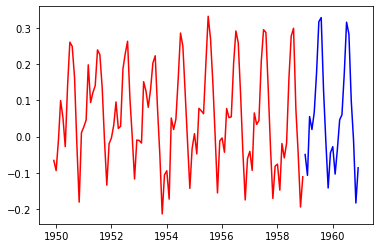

In [191]:
plt.plot(trd,c="red")
plt.plot(tsd,c="blue")

In [197]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start = "1959-01-01",end = "1960-12-01")
tsd["Forecasted_from_AR"] = pred

C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-197-cabe4d99d8ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsd["Forecasted_from_AR"] = pred


In [199]:
tsd

,Pass,Forecasted_from_AR
year,,
1959-01-01,-0.049241,-0.063446
1959-02-01,-0.106598,-0.142865
1959-03-01,0.055385,-0.054353
1959-04-01,0.019679,-0.080923
1959-05-01,0.066365,0.000782
1959-06-01,0.176286,0.147897
1959-07-01,0.316430,0.266176
1959-08-01,0.327838,0.276603
1959-09-01,0.128057,0.111256


<AxesSubplot:xlabel='year'>

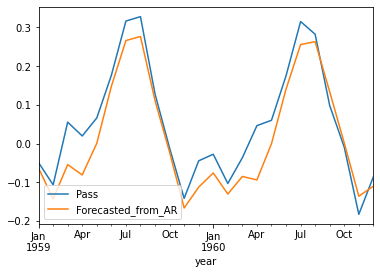

In [213]:
tsd.plot()

In [237]:
trd = B[B.index.year<=1958]
tsd = B[B.index.year>1958]

B = B.astype('float32')

from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(trd,order=(1,0,1)).fit()
pred = model_arima.predict(start="1959-01-01",end="1960-12-01")

C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [238]:
tsd['Forecasted_from_ARIMA']=pred

In [239]:
tsd

,Pass,Forecasted_from_ARIMA
year,,
1959-01-01,-0.049241,0.020640
1959-02-01,-0.106598,0.041302
1959-03-01,0.055385,0.049169
1959-04-01,0.019679,0.052163
1959-05-01,0.066365,0.053304
1959-06-01,0.176286,0.053738
1959-07-01,0.316430,0.053903
1959-08-01,0.327838,0.053966
1959-09-01,0.128057,0.053990


<AxesSubplot:xlabel='year'>

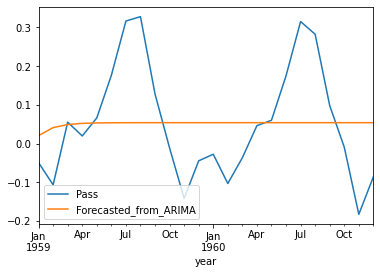

In [240]:
tsd.plot()